In [5]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import  show, figure
from pathlib import Path
import sys

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

# Import the module
from utils.pipeline import Pipeline
from utils.dslabs_functions import plot_bar_chart

pipeline = Pipeline()
# data, target = dataloader.get_security_classification_dataset_and_target()
data, target = pipeline.get_econmical_classification_dataset_and_target()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


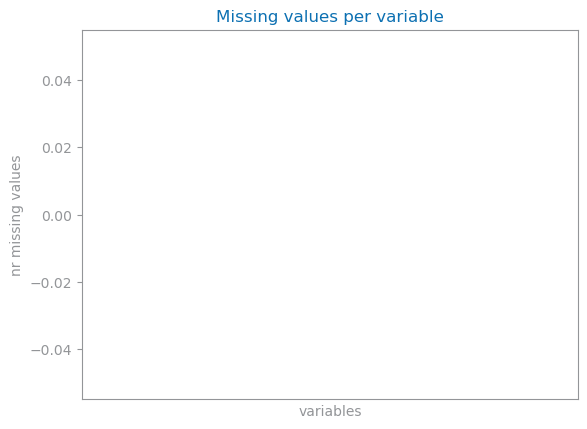

In [6]:
mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

### No missing values. Lets look at the other dataset

## Clasification handling missing values
Find the missing values and handle them

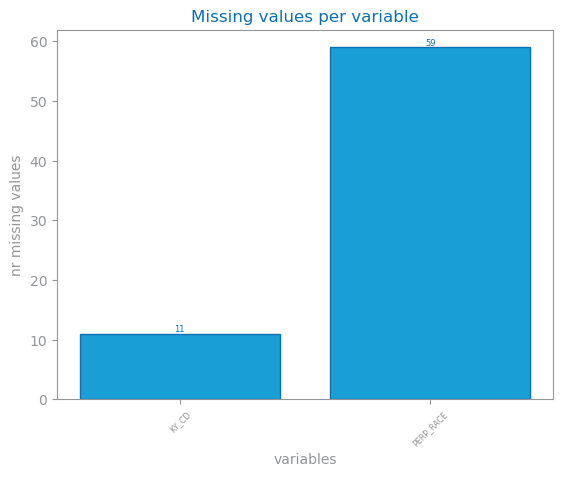

In [7]:
data, target = pipeline.get_security_classification_dataset_and_target()
mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

In [8]:
# print the rows with missing values
missing_data = data[data.isnull().any(axis=1)]
missing_rows_lenght = len(missing_data)
total_rows = len(data)

percentage_missing = (missing_rows_lenght / total_rows) * 100

print(f"Percentage of rows with missing values: {percentage_missing:.2f}%")

Percentage of rows with missing values: 1.37%


## since there are so few missing values, we can drop them. Besides, it would be hard to impute the missing values in this case.
In fact, since we are sampling 1% of the dataset, we could just sample some more data to make up for the dropped rows. However, it wont be necessary since we have enough data to work with.

Filling the missing values could be done with mode, but it is not necessary in this case.